In [ ]:
clear()

## Q1

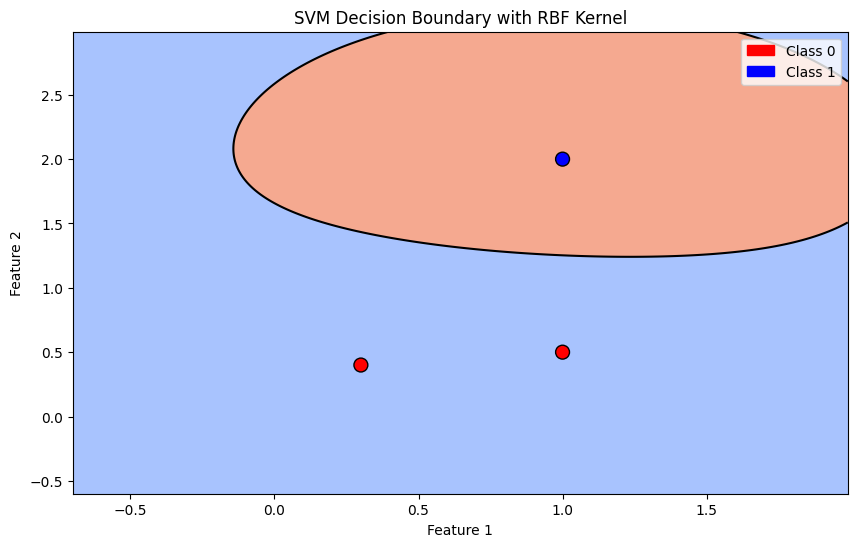

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap

# Training data points and their labels
X = np.array([[1, 0.5], [1, 2], [0.3, 0.4]])
y = np.array([0, 1, 0])

# Train the SVM with an RBF kernel
clf = svm.SVC(kernel='rbf', C=1e6)
clf.fit(X, y)

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict decision function for each point in the mesh
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.figure(figsize=(10, 6))
contour = plt.contourf(xx, yy, Z, levels=[Z.min(), 0, Z.max()], cmap='coolwarm', alpha=0.8)
plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='-')

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), s=100, edgecolors='k', label='Observations')

# Title and labels
plt.title('SVM Decision Boundary with RBF Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Creating a custom legend for the classes
red_patch = Patch(color='#FF0000', label='Class 0')
blue_patch = Patch(color='#0000FF', label='Class 1')
plt.legend(handles=[red_patch, blue_patch], loc='best')

# Show the plot
plt.show()


## **Q2**

In [ ]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('HW6_train.csv')
test_df = pd.read_csv('HW6_future.csv')

### Data exploring

In [ ]:
summary_statistics = train_df.describe()
median_values = train_df.median()
summary_statistics.loc['median'] = median_values
summary_statistics

,price,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,car_id
count,11009.000000,10491.000000,10755.000000,10747.000000,1.096200e+04,10962.000000,10959.000000,10968.000000,11009.000000,11009.000000,...,11009.000000,11009.000000,11009.000000,9904.000000,11009.000000,11009.000000,11009.000000,11009.000000,11009.000000,11009.000000
mean,4882.247857,3.372796,2.114644,1888.721131,1.364568e+04,1.500684,0.006935,0.226842,3.409301,7.651285,...,264.262785,7.786883,1.168553,11.496114,0.358778,-0.014293,1802.526842,11499.613680,6.578254,10873.897902
std,3335.832929,0.914714,0.765342,853.535227,3.766749e+04,0.544418,0.082991,0.752590,0.652149,1.170832,...,402.899412,0.014923,1.351444,0.000544,0.138533,0.140060,648.944645,24627.439588,3.111436,6223.227499
min,637.270000,0.000000,0.000000,303.000000,5.470000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,0.000000,7.750135,0.893147,11.495321,-0.044100,-0.319000,444.000000,602.000000,1.000000,1.000000
25%,2880.100000,3.000000,1.750000,1288.000000,4.556000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,7.777122,0.893147,11.495647,0.267400,-0.129000,1328.000000,4648.000000,4.000000,5527.000000
50%,4089.010000,3.000000,2.250000,1734.000000,6.840500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,7.789336,0.893147,11.495973,0.370300,-0.031000,1666.000000,6814.000000,6.000000,10918.000000
75%,5851.140000,4.000000,2.500000,2313.000000,9.765000e+03,2.000000,0.000000,0.000000,4.000000,8.000000,...,498.000000,7.800402,0.893147,11.496511,0.476900,0.075000,2151.000000,9217.000000,9.000000,16222.000000
max,60880.660000,11.000000,8.000000,12557.000000,1.507647e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,4308.000000,7.808871,7.809367,11.497335,0.577600,0.885000,5505.000000,745101.000000,12.000000,21612.000000
median,4089.010000,3.000000,2.250000,1734.000000,6.840500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,7.789336,0.893147,11.495973,0.370300,-0.031000,1666.000000,6814.000000,6.000000,10918.000000


### Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

X = train_df.drop('price', axis=1)  # Features
y = train_df['price']  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

### Fitting RandomForest model

In [ ]:
# Define the model
model_RF = RandomForestRegressor(n_estimators=200, max_depth = 20, random_state=42)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model_RF)])

# Fit the model using training data
clf.fit(X_train, y_train)

# Predict y using splitted test data
y_pred_RF = clf.predict(X_test)

### Calculating MSE

In [ ]:
from sklearn.metrics import mean_squared_error

# MSE
mse_RF = mean_squared_error(y_test, y_pred_RF)

mse_RF

1873609.443271575

## Apply the model to HW6_future.csv

In [ ]:
X_future = test_df.drop('price', axis=1)
y_future = test_df['price']

y_future_pred = clf.predict(X_future)

In [ ]:
# Check the predicted values
y_future_pred, len(y_future_pred)

(array([3218.98545   , 2842.69826622, 3010.83116765, ..., 2585.92893861,
        3833.32227304, 4435.55303364]),
 9571)

In [ ]:
# Save predictions to CSV
pd.DataFrame(y_future_pred, columns=['Prediction']).to_csv("HW6_output.csv", index=False)